In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
)

# Cargar todos los datasets
X_train_normal = np.load("./trains/X_train_scaled.npy")
X_train_smote = np.load('./trains/X_train_smote.npy')
X_train_smoteenn = np.load('./trains/X_train_smoteenn.npy')
X_test = np.load("./trains/X_test_scaled.npy")

y_train_normal = np.load("./trains/y_train.npy")
y_train_smote = np.load('./trains/y_train_smote.npy')
y_train_smoteenn = np.load('./trains/y_train_smoteenn.npy')
y_test = np.load("./trains/y_test.npy")

In [2]:
# Función auxiliar para evaluar modelos
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_proba))
    print("F1:", f1_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    return y_proba

In [3]:
# LOGISTIC REGRESSION - Los 3 enfoques
print("=" * 50)
print("LOGISTIC REGRESSION")
print("=" * 50)

# Normal
log_reg_normal = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg_normal.fit(X_train_normal, y_train_normal)
y_proba_lr_normal = evaluate_model(log_reg_normal, X_test, y_test, "Logistic Regression - Normal")

# SMOTE
log_reg_smote = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_proba_lr_smote = evaluate_model(log_reg_smote, X_test, y_test, "Logistic Regression - SMOTE")

# SMOTEENN
log_reg_smoteenn = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)
y_proba_lr_smoteenn = evaluate_model(log_reg_smoteenn, X_test, y_test, "Logistic Regression - SMOTEENN")

LOGISTIC REGRESSION

=== Logistic Regression - Normal ===
              precision    recall  f1-score   support

           0     0.9967    0.8131    0.8956    239020
           1     0.0431    0.7587    0.0816      2652

    accuracy                         0.8125    241672
   macro avg     0.5199    0.7859    0.4886    241672
weighted avg     0.9863    0.8125    0.8867    241672

Confusion Matrix:
 [[194355  44665]
 [   640   2012]]
AUC: 0.8679432216492861
F1: 0.0815747329157291
Precision: 0.043104741093043686
Recall: 0.7586726998491704

=== Logistic Regression - SMOTE ===
              precision    recall  f1-score   support

           0     0.9965    0.8243    0.9023    239020
           1     0.0448    0.7421    0.0844      2652

    accuracy                         0.8234    241672
   macro avg     0.5207    0.7832    0.4934    241672
weighted avg     0.9861    0.8234    0.8933    241672

Confusion Matrix:
 [[197026  41994]
 [   684   1968]]
AUC: 0.8659980806493283
F1: 0.0844381

In [4]:
# RANDOM FOREST - Los 3 enfoques
print("=" * 50)
print("RANDOM FOREST")
print("=" * 50)

# Normal
rf_normal = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)
rf_normal.fit(X_train_normal, y_train_normal)
y_proba_rf_normal = evaluate_model(rf_normal, X_test, y_test, "Random Forest - Normal")

# SMOTE
rf_smote = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)
rf_smote.fit(X_train_smote, y_train_smote)
y_proba_rf_smote = evaluate_model(rf_smote, X_test, y_test, "Random Forest - SMOTE")

# SMOTEENN
rf_smoteenn = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)
rf_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)
y_proba_rf_smoteenn = evaluate_model(rf_smoteenn, X_test, y_test, "Random Forest - SMOTEENN")

RANDOM FOREST



=== Random Forest - Normal ===
              precision    recall  f1-score   support

           0     0.9958    0.8594    0.9226    239020
           1     0.0507    0.6761    0.0943      2652

    accuracy                         0.8574    241672
   macro avg     0.5232    0.7678    0.5084    241672
weighted avg     0.9855    0.8574    0.9135    241672

Confusion Matrix:
 [[205421  33599]
 [   859   1793]]
AUC: 0.8583262058130023
F1: 0.09425927872989172
Precision: 0.05066116636528029
Recall: 0.6760935143288085

=== Random Forest - SMOTE ===
              precision    recall  f1-score   support

           0     0.9949    0.9035    0.9470    239020
           1     0.0624    0.5792    0.1127      2652

    accuracy                         0.8999    241672
   macro avg     0.5286    0.7413    0.5298    241672
weighted avg     0.9846    0.8999    0.9378    241672

Confusion Matrix:
 [[215948  23072]
 [  1116   1536]]
AUC: 0.8515111589392231
F1: 0.11269258987527513
Precision: 0.06241872

In [5]:
# XGBOOST - Los 3 enfoques
print("=" * 50)
print("XGBOOST")
print("=" * 50)

# Normal
xgb_normal = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(y_train_normal == 0).sum() / (y_train_normal == 1).sum(),
    eval_metric="logloss",
    tree_method="hist",
    random_state=42
)
xgb_normal.fit(X_train_normal, y_train_normal)
y_proba_xgb_normal = evaluate_model(xgb_normal, X_test, y_test, "XGBoost - Normal")

# SMOTE
xgb_smote = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(y_train_smote == 0).sum() / (y_train_smote == 1).sum(),
    eval_metric="logloss",
    tree_method="hist",
    random_state=42
)
xgb_smote.fit(X_train_smote, y_train_smote)
y_proba_xgb_smote = evaluate_model(xgb_smote, X_test, y_test, "XGBoost - SMOTE")

# SMOTEENN
xgb_smoteenn = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(y_train_smoteenn == 0).sum() / (y_train_smoteenn == 1).sum(),
    eval_metric="logloss",
    tree_method="hist",
    random_state=42
)
xgb_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)
y_proba_xgb_smoteenn = evaluate_model(xgb_smoteenn, X_test, y_test, "XGBoost - SMOTEENN")

XGBOOST

=== XGBoost - Normal ===
              precision    recall  f1-score   support

           0     0.9968    0.8332    0.9077    239020
           1     0.0479    0.7568    0.0902      2652

    accuracy                         0.8324    241672
   macro avg     0.5224    0.7950    0.4989    241672
weighted avg     0.9864    0.8324    0.8987    241672

Confusion Matrix:
 [[199163  39857]
 [   645   2007]]
AUC: 0.8771607729425067
F1: 0.09016982657920748
Precision: 0.04794095165297153
Recall: 0.7567873303167421

=== XGBoost - SMOTE ===
              precision    recall  f1-score   support

           0     0.9922    0.9801    0.9861    239020
           1     0.1437    0.3013    0.1946      2652

    accuracy                         0.9726    241672
   macro avg     0.5679    0.6407    0.5903    241672
weighted avg     0.9828    0.9726    0.9774    241672

Confusion Matrix:
 [[234260   4760]
 [  1853    799]]
AUC: 0.8702645696738303
F1: 0.19461697722567287
Precision: 0.143730886850

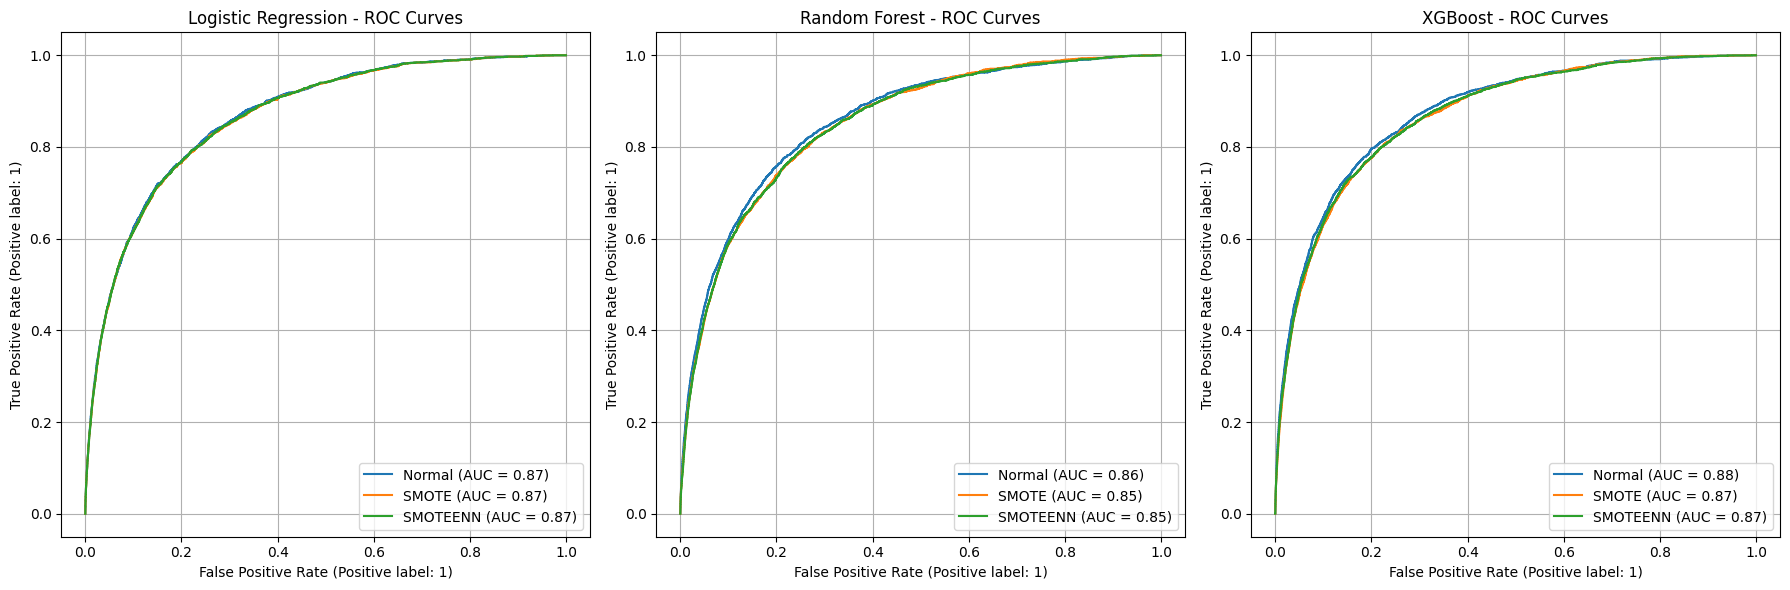

In [6]:
# ROC CURVES - Comparación completa por modelo
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression
RocCurveDisplay.from_estimator(log_reg_normal, X_test, y_test, name="Normal", ax=axes[0])
RocCurveDisplay.from_estimator(log_reg_smote, X_test, y_test, name="SMOTE", ax=axes[0])
RocCurveDisplay.from_estimator(log_reg_smoteenn, X_test, y_test, name="SMOTEENN", ax=axes[0])
axes[0].set_title("Logistic Regression - ROC Curves")
axes[0].grid(True)

# Random Forest
RocCurveDisplay.from_estimator(rf_normal, X_test, y_test, name="Normal", ax=axes[1])
RocCurveDisplay.from_estimator(rf_smote, X_test, y_test, name="SMOTE", ax=axes[1])
RocCurveDisplay.from_estimator(rf_smoteenn, X_test, y_test, name="SMOTEENN", ax=axes[1])
axes[1].set_title("Random Forest - ROC Curves")
axes[1].grid(True)

# XGBoost
RocCurveDisplay.from_estimator(xgb_normal, X_test, y_test, name="Normal", ax=axes[2])
RocCurveDisplay.from_estimator(xgb_smote, X_test, y_test, name="SMOTE", ax=axes[2])
RocCurveDisplay.from_estimator(xgb_smoteenn, X_test, y_test, name="SMOTEENN", ax=axes[2])
axes[2].set_title("XGBoost - ROC Curves")
axes[2].grid(True)

plt.tight_layout()
plt.savefig('./plots/models/roc_curves_comparison_all.png', dpi=300, bbox_inches='tight')
plt.show()

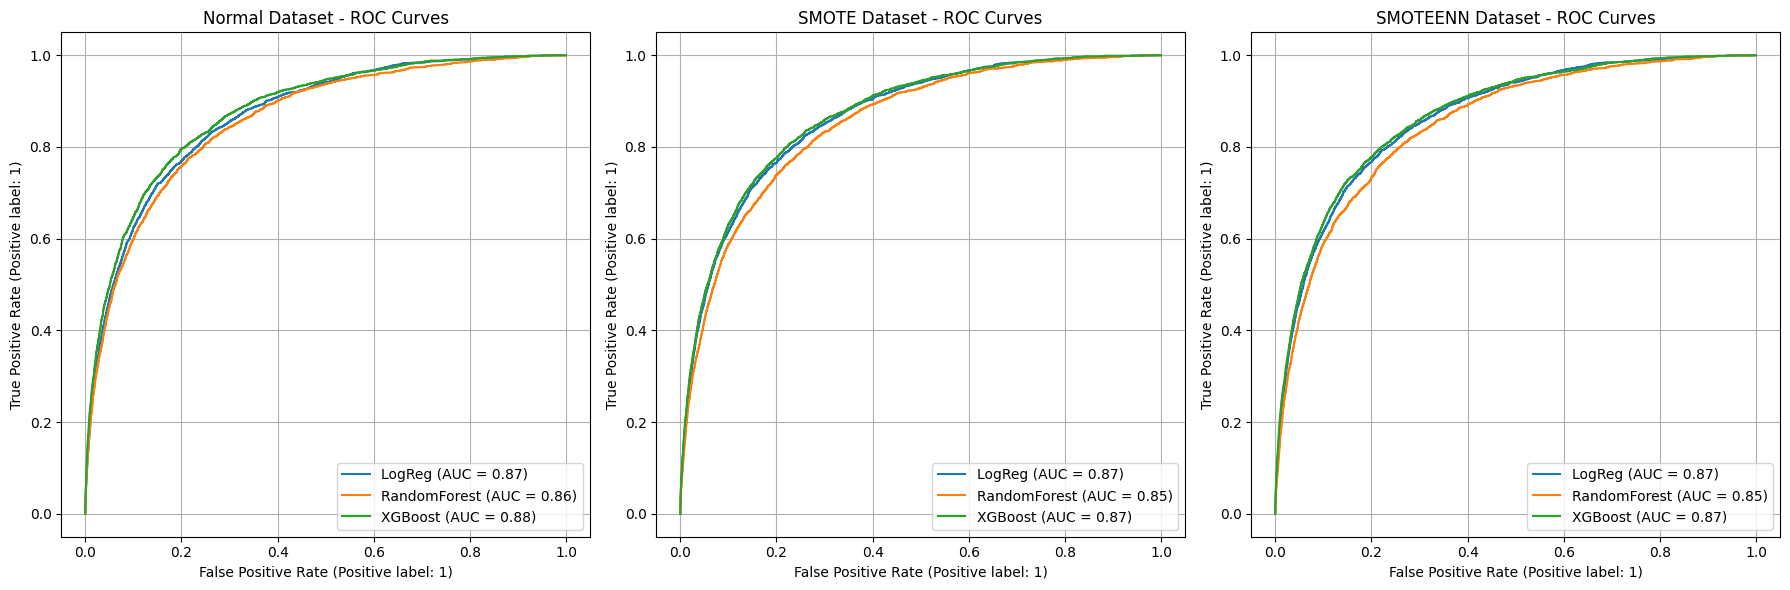

In [7]:
# ROC CURVES - Comparación por técnica de balanceo
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Normal
RocCurveDisplay.from_estimator(log_reg_normal, X_test, y_test, name="LogReg", ax=axes[0])
RocCurveDisplay.from_estimator(rf_normal, X_test, y_test, name="RandomForest", ax=axes[0])
RocCurveDisplay.from_estimator(xgb_normal, X_test, y_test, name="XGBoost", ax=axes[0])
axes[0].set_title("Normal Dataset - ROC Curves")
axes[0].grid(True)

# SMOTE
RocCurveDisplay.from_estimator(log_reg_smote, X_test, y_test, name="LogReg", ax=axes[1])
RocCurveDisplay.from_estimator(rf_smote, X_test, y_test, name="RandomForest", ax=axes[1])
RocCurveDisplay.from_estimator(xgb_smote, X_test, y_test, name="XGBoost", ax=axes[1])
axes[1].set_title("SMOTE Dataset - ROC Curves")
axes[1].grid(True)

# SMOTEENN
RocCurveDisplay.from_estimator(log_reg_smoteenn, X_test, y_test, name="LogReg", ax=axes[2])
RocCurveDisplay.from_estimator(rf_smoteenn, X_test, y_test, name="RandomForest", ax=axes[2])
RocCurveDisplay.from_estimator(xgb_smoteenn, X_test, y_test, name="XGBoost", ax=axes[2])
axes[2].set_title("SMOTEENN Dataset - ROC Curves")
axes[2].grid(True)

plt.tight_layout()
plt.savefig('./plots/models/roc_curves_by_technique.png', dpi=300, bbox_inches='tight')
plt.show()